In [ ]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Download dataset from mnist
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
ytrain[10]

3

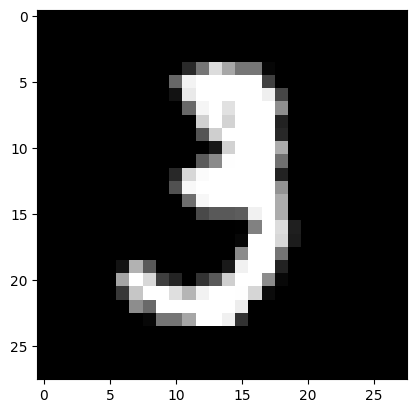

In [ ]:
plt.imshow(xtrain[10],cmap='gray');

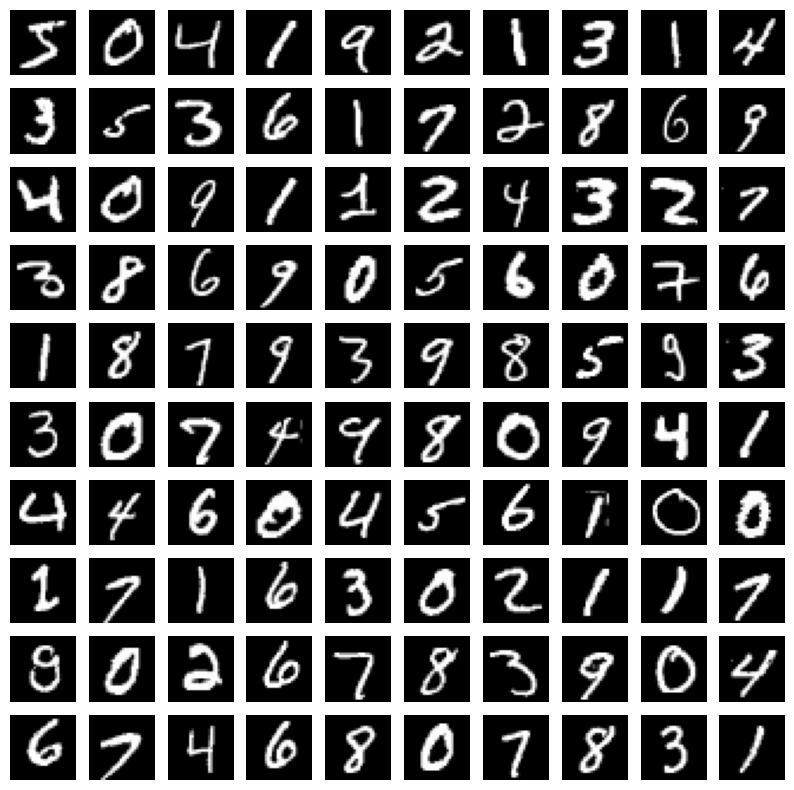

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.axis("off")
plt.show();

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
### Neural Network
model = tf.models.Sequential()
model.add(tf.layers.Flatten())   ## input layer
model.add(tf.layers.Dense(784, activation='relu'))   ## hidden layer
model.add(tf.layers.Dense(10, activation='softmax'))   ## output layers
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1884 - accuracy: 0.9438
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0753 - accuracy: 0.9774
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
ypred = model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [ ]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
ypred

array([[2.5028588e-17, 4.8491336e-15, 1.0520084e-15, ..., 9.9999994e-01,
        2.4498057e-20, 2.6811575e-10],
       [1.0471650e-20, 2.5673051e-13, 9.9999994e-01, ..., 1.4131899e-27,
        2.6131774e-16, 1.6472663e-33],
       [6.8418052e-19, 9.9999994e-01, 2.1944202e-10, ..., 3.6483827e-09,
        1.6481979e-09, 8.9865977e-18],
       ...,
       [1.6370642e-30, 6.6265258e-19, 1.3616026e-30, ..., 1.6114326e-14,
        2.4591844e-15, 4.2038679e-14],
       [6.6290002e-20, 1.8492136e-24, 1.4322945e-26, ..., 9.1860391e-24,
        1.3003724e-09, 7.4423341e-27],
       [3.9514960e-18, 2.5334625e-25, 3.2275123e-21, ..., 1.9761986e-30,
        1.2199796e-21, 9.0572165e-26]], dtype=float32)

In [ ]:
ypred[0]

array([2.50285878e-17, 4.84913360e-15, 1.05200836e-15, 1.84378450e-11,
       1.03460105e-22, 2.08385759e-18, 8.46608220e-27, 9.99999940e-01,
       2.44980573e-20, 2.68115752e-10], dtype=float32)

In [ ]:
np.argmax(ypred[0])

7

In [ ]:
ypred = np.argmax(ypred,axis=1)

In [ ]:
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cm = confusion_matrix(ytest,ypred)
cm

array([[ 973,    1,    1,    0,    0,    1,    0,    1,    3,    0],
       [   0, 1126,    1,    2,    0,    0,    0,    1,    5,    0],
       [   2,    3, 1010,    1,    1,    0,    0,    4,    9,    2],
       [   0,    0,    2,  983,    0,    7,    0,    3,    7,    8],
       [   2,    1,    5,    1,  946,    1,    1,    2,    1,   22],
       [   3,    0,    0,    8,    1,  874,    3,    0,    2,    1],
       [   2,    4,    0,    1,    2,    3,  943,    1,    2,    0],
       [   3,    2,    6,    0,    0,    0,    0,  989,    4,   24],
       [   1,    0,    2,    3,    2,    0,    2,    2,  959,    3],
       [   2,    2,    0,    1,    3,    4,    1,    0,    3,  993]])

In [ ]:
accuracy = accuracy_score(ytest,ypred)
accuracy

0.9796

In [ ]:
wrong_sample_id=[]
for i in range(len(ypred)):
  if(ypred[i]!=ytest[i]):
    wrong_sample_id.append(i)
print(wrong_sample_id)
len(wrong_sample_id)

[62, 104, 115, 149, 171, 247, 321, 340, 381, 432, 445, 449, 582, 613, 619, 659, 720, 726, 774, 900, 938, 947, 1014, 1039, 1044, 1112, 1114, 1156, 1178, 1181, 1226, 1242, 1247, 1260, 1319, 1328, 1393, 1425, 1494, 1522, 1530, 1549, 1554, 1569, 1681, 1722, 1751, 1790, 1809, 1878, 1901, 1941, 2024, 2035, 2040, 2053, 2070, 2090, 2109, 2118, 2135, 2185, 2224, 2272, 2293, 2314, 2326, 2369, 2387, 2408, 2447, 2488, 2514, 2534, 2597, 2648, 2654, 2671, 2771, 2843, 2877, 2901, 2921, 2927, 2939, 2953, 3073, 3117, 3225, 3333, 3388, 3405, 3422, 3437, 3451, 3474, 3490, 3503, 3520, 3533, 3558, 3597, 3604, 3681, 3726, 3742, 3762, 3796, 3808, 3853, 3893, 3902, 3906, 3941, 3943, 4000, 4065, 4140, 4142, 4163, 4176, 4194, 4199, 4201, 4248, 4265, 4289, 4313, 4360, 4497, 4567, 4635, 4761, 4807, 4808, 4815, 4823, 4879, 4880, 4966, 5457, 5600, 5634, 5642, 5655, 5676, 5734, 5887, 5936, 5955, 5973, 6009, 6011, 6023, 6046, 6059, 6555, 6559, 6576, 6597, 6598, 6625, 6651, 6755, 6791, 7434, 7856, 7902, 7909, 7915, 79

204

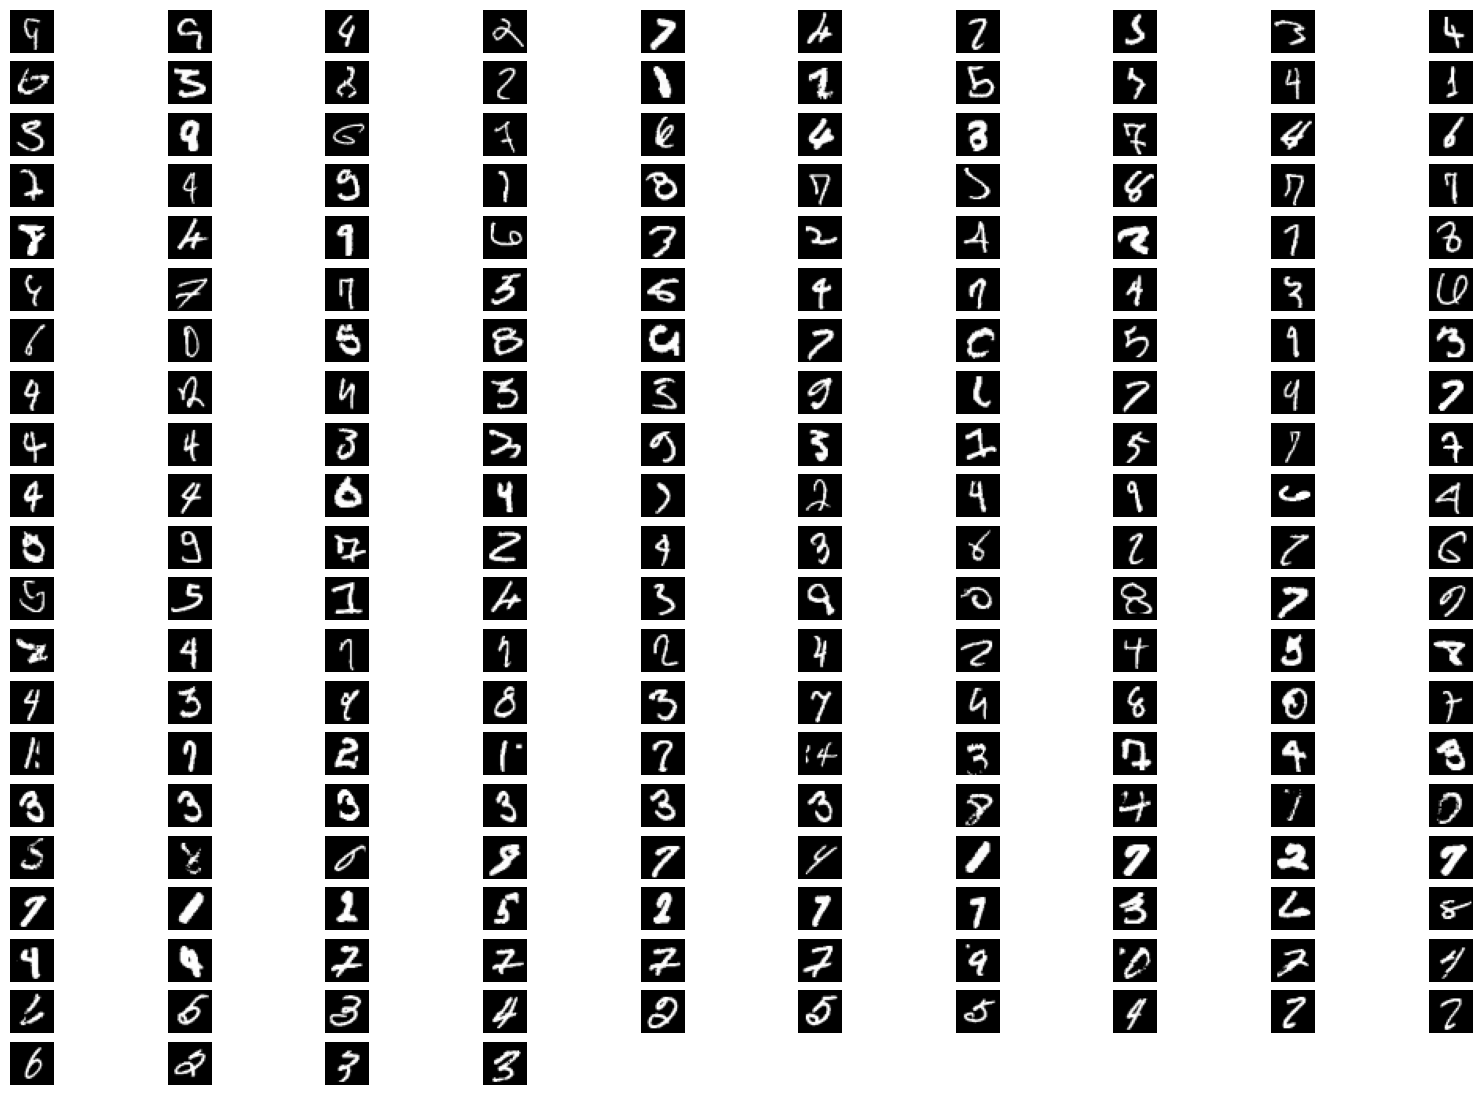

In [ ]:
plt.figure(figsize=(20,20))
j = 0
for i in wrong_sample_id:
  plt.subplot(30,10,j+1)
  plt.imshow(xtest[i],cmap='gray')
  plt.axis("off")
  j = j+1
plt.show();

In [ ]:
### Testing new image

In [ ]:
import cv2

(28, 28)
1/1 [==============================] - 0s 16ms/step
3


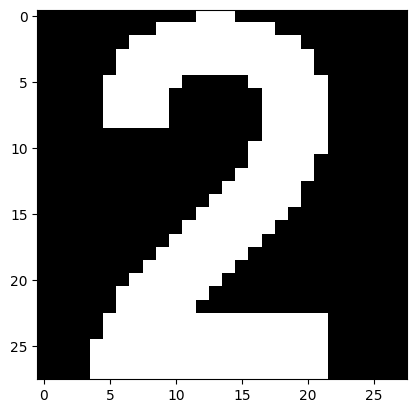

In [ ]:
img = cv2.imread("/content/image_2.png",0)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img/255
plt.imshow(img,cmap='gray')
print(img.shape)
print(np.argmax(model.predict(np.array([img]))))
plt.show()

(28, 28)
1/1 [==============================] - 0s 68ms/step
3


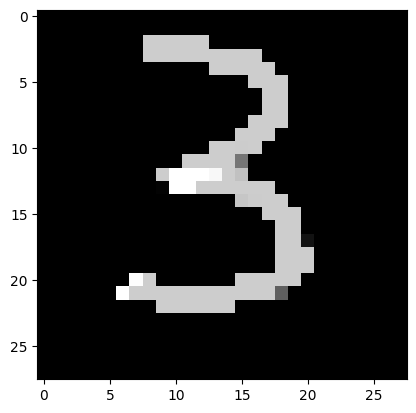

In [ ]:
img = cv2.imread("/content/3.png",0)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img/255
plt.imshow(img,cmap='gray')
print(img.shape)
print(np.argmax(model.predict(np.array([img]))))
plt.show()